In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import nltk
from collections import defaultdict

In [2]:
df= pd.read_excel("Book1.xlsx")

In [3]:
df

,FromNodeId,ToNodeId
0,30,1412
1,30,3352
2,30,5254
3,30,5543
4,30,7478
...,...,...
103684,8272,4940
103685,8273,4940
103686,8150,8275
103687,8150,8276


In [4]:
source_list = df['FromNodeId'].tolist()
target_list = df['ToNodeId'].tolist()
total_list = source_list+target_list

In [5]:
new_node_list = []
for node in total_list:
    if node not in new_node_list:
        new_node_list.append(node)  

In [6]:
l=len(new_node_list)
dim = (l , l)
adjacent_matrix = np.zeros(dim)

In [7]:
#number of nodes
print(l)

7115


In [8]:
# adjacency_list
adjacency_list = defaultdict(list)
for i in range(len(source_list)):
    adjacency_list[source_list[i]].append(target_list[i])

In [9]:
#adjacency_matrix
for i in range(len(source_list)):
    row = new_node_list.index(source_list[i])
    col = new_node_list.index(target_list[i])
    adjacent_matrix[row][col] = 1
    

In [10]:
import pickle
pickle.dump(adjacent_matrix, open("adj_matrix2", 'wb'))
loaded_model = pickle.load(open("adj_matrix2", 'rb'))

In [11]:
edge_count = 0;
for i in range(l):
    for j in range(l):
        if (loaded_model[i][j]==1):
            edge_count = edge_count+1        

In [12]:
#number of edges
edge_count

103689

In [13]:
#avg in degree
indeg = 0
for j in range(l):
    for i in range(l):
        if(loaded_model[i][j]==1):
            indeg = indeg+1

avg_in_degree = indeg/l
print(avg_in_degree)

14.573295853829936


In [14]:
#avg out degree
outdeg = 0
for i in range(l):
    for j in range(l):
        if(loaded_model[i][j]==1):
            outdeg = outdeg+1
avg_out_degree = outdeg/l
print(avg_out_degree)

14.573295853829936


In [15]:
#node with max indegree
indegrees = []
max_indeg = 0
for j in range(l):
    indeg=0
    for i in range(l):
        if(loaded_model[i][j]==1):
            indeg = indeg+1
    indegrees.append(indeg)
    if(indeg>=max_indeg):
        max_indeg=indeg
        index_max = j
print(new_node_list[index_max])
    

4037


In [16]:
#node with max outdegree
max_outdeg = 0
outdegrees = []
for i in range(l):
    outdeg=0
    for j in range(l):
        if(loaded_model[i][j]==1):
            outdeg = outdeg+1
    outdegrees.append(outdeg)
    if(outdeg>=max_outdeg):
        max_outdeg=outdeg
        index_max = i
print(new_node_list[index_max])


2565


In [17]:
#network density without self loops in network graph
network_dense = edge_count/(l*(l-1))
print(network_dense)

0.0020485375110809584


In [18]:
pr_ind_distri = []
indegree_list = []
for degree in range(1,max_indeg+1):
    indegree_list.append(degree)
    pr = indegrees.count(degree)
    pr_ind_distri.append(pr)   

Text(0.5, 0, 'Number of nodes')

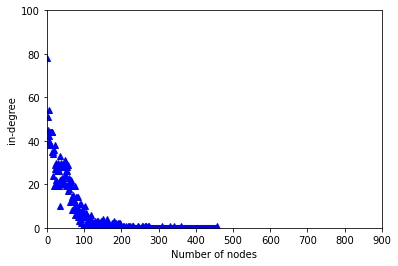

In [19]:
import matplotlib.pyplot as plt
plt.plot(indegree_list,pr_ind_distri,'b^')
plt.xlim(0, 900)
plt.ylim(0, 100)
plt.ylabel("in-degree")
plt.xlabel("Number of nodes")

In [21]:
pr_out_distri = []
outdegree_list = []
for degree in range(1,max_outdeg+1):
    outdegree_list.append(degree)
    pr = outdegrees.count(degree)
    pr_out_distri.append(pr)  

Text(0.5, 0, 'Number of nodes')

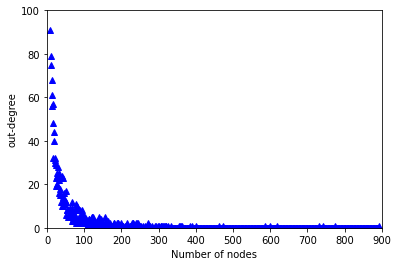

In [22]:
plt.plot(outdegree_list,pr_out_distri,'b^')
plt.xlim(0, 900)
plt.ylim(0, 100)
plt.ylabel("out-degree")
plt.xlabel("Number of nodes")

In [23]:
l=len(new_node_list)
dim = (l , l)
new_adjacent_matrix = np.zeros(dim)

In [24]:
new_adjacent_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
for i in range(len(source_list)):
    row = new_node_list.index(source_list[i])
    col = new_node_list.index(target_list[i])
    new_adjacent_matrix[row][col] = 1
    new_adjacent_matrix[col][row] = 1

In [26]:
new_adjacent_matrix.shape

(7115, 7115)

In [27]:
degree_list = []
for i in range(l):
    sum1 = 0
    for j in range(l):
        if(new_adjacent_matrix[i][j]==1):
            sum1 = sum1+1
    degree_list.append(sum1)       

In [28]:
degree_list

[28,
 51,
 90,
 29,
 23,
 314,
 24,
 217,
 81,
 99,
 743,
 65,
 11,
 114,
 403,
 15,
 45,
 12,
 57,
 187,
 76,
 2,
 92,
 309,
 45,
 230,
 56,
 23,
 253,
 159,
 20,
 27,
 63,
 11,
 95,
 30,
 89,
 4,
 44,
 8,
 59,
 146,
 21,
 36,
 43,
 24,
 1,
 39,
 179,
 120,
 168,
 13,
 38,
 94,
 9,
 17,
 102,
 1,
 10,
 2,
 44,
 303,
 13,
 95,
 2,
 41,
 53,
 25,
 98,
 18,
 8,
 2,
 17,
 1,
 1,
 218,
 109,
 195,
 1,
 45,
 72,
 18,
 5,
 1,
 103,
 40,
 24,
 2,
 5,
 8,
 15,
 5,
 68,
 3,
 2,
 30,
 24,
 9,
 275,
 1,
 1,
 1,
 4,
 12,
 190,
 95,
 29,
 8,
 1,
 9,
 213,
 89,
 1,
 3,
 1,
 33,
 25,
 150,
 80,
 4,
 55,
 10,
 2,
 42,
 99,
 1,
 72,
 37,
 50,
 1,
 25,
 94,
 72,
 18,
 1,
 107,
 1,
 67,
 19,
 76,
 81,
 4,
 44,
 7,
 1,
 1,
 32,
 4,
 23,
 3,
 33,
 115,
 123,
 20,
 334,
 1,
 69,
 39,
 19,
 96,
 17,
 54,
 3,
 111,
 93,
 4,
 5,
 37,
 4,
 17,
 1,
 1,
 2,
 11,
 1,
 1,
 17,
 13,
 1,
 21,
 6,
 31,
 142,
 12,
 1,
 1,
 6,
 10,
 43,
 1,
 29,
 29,
 100,
 1,
 10,
 12,
 19,
 29,
 1,
 44,
 5,
 31,
 48,
 2,
 86,
 4,
 3,


In [29]:
lcc = []
for i in range(l):
    neighbor_list = []
    for j in range(l):
        if(new_adjacent_matrix[i][j]==1):
            neighbor_list.append(j)
    new_neighbor_list = neighbor_list
    
    nv=0
    for u in neighbor_list:
        for v in new_neighbor_list:
            if(new_adjacent_matrix[u][v]==1):
                nv=nv+1
    kv=degree_list[i]
    if(kv==1):
        lcc.append(0) 
    else:
        kv1=kv*(kv-1)
        cc=nv/kv1
        lcc.append(cc)   

In [30]:
lc_set = set(lcc)

In [31]:
node_freq = []
for cc in lc_set:
    node_freq.append(lcc.count(cc))

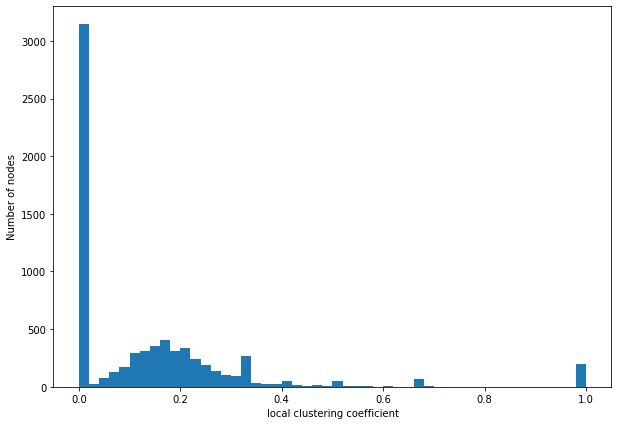

In [32]:
from matplotlib import pyplot as plt
a = np.array(lcc)
fig, ax = plt.subplots(figsize =(10, 7))
plt.xlabel("local clustering coefficient")
plt.ylabel("Number of nodes")
ax.hist(a, bins = 50)
plt.show()